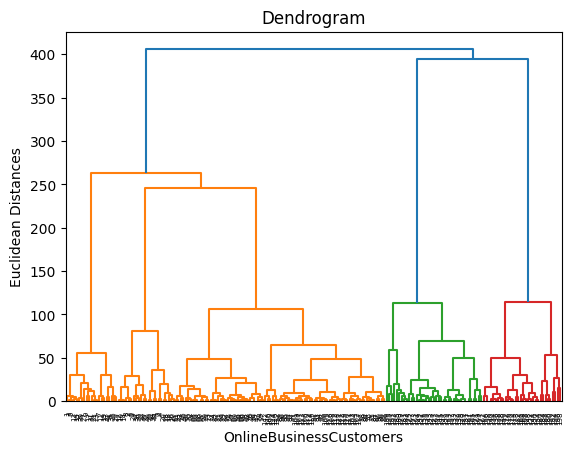

C:\Users\Vaibhav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


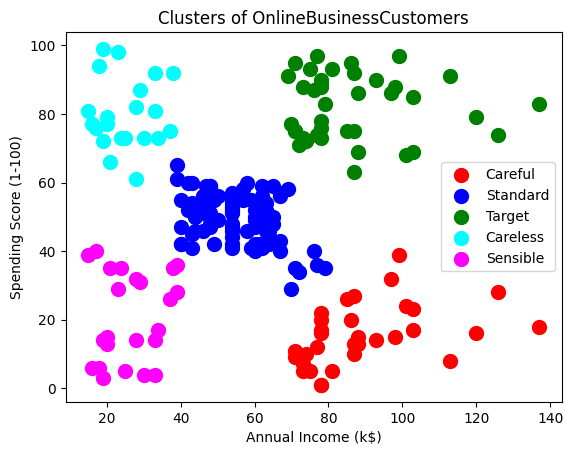

In [2]:
# Hierarchical Clustering
import matplotlib.pyplot as plotter
import pandas as pd
collectedDataset = pd.read_csv("Datasets_5/OnlineBusinessCustomers.csv")
X = collectedDataset.iloc[:,[3,4]].values

# Use Dendrogram to find out the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plotter.title('Dendrogram')
plotter.xlabel('OnlineBusinessCustomers')
plotter.ylabel('Euclidean Distances')
plotter.show()

# Fit the Hierarchical Clustering Model to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y_hc=hc.fit_predict(X)

# Visualize the clusters
plotter.scatter(X[Y_hc==0,0],X[Y_hc==0,1],s=100,c='red',label='Careful')
plotter.scatter(X[Y_hc==1,0],X[Y_hc==1,1],s=100,c='blue',label='Standard')
plotter.scatter(X[Y_hc==2,0],X[Y_hc==2,1],s=100,c='green',label='Target')
plotter.scatter(X[Y_hc==3,0],X[Y_hc==3,1],s=100,c='cyan',label='Careless')
plotter.scatter(X[Y_hc==4,0],X[Y_hc==4,1],s=100,c='magenta',label='Sensible')
plotter.title('Clusters of OnlineBusinessCustomers')
plotter.xlabel('Annual Income (k$)')
plotter.ylabel('Spending Score (1-100)')
plotter.legend()
plotter.show()

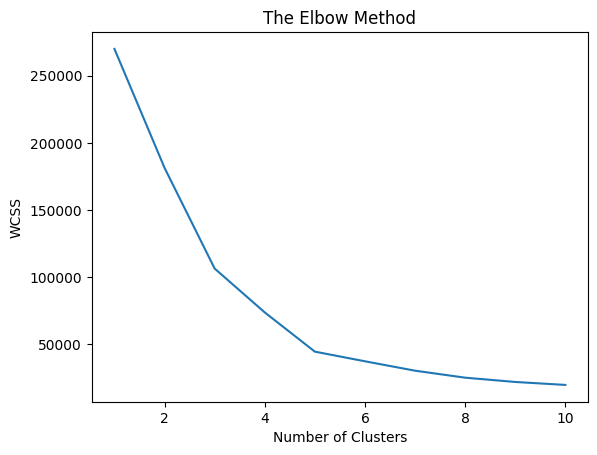

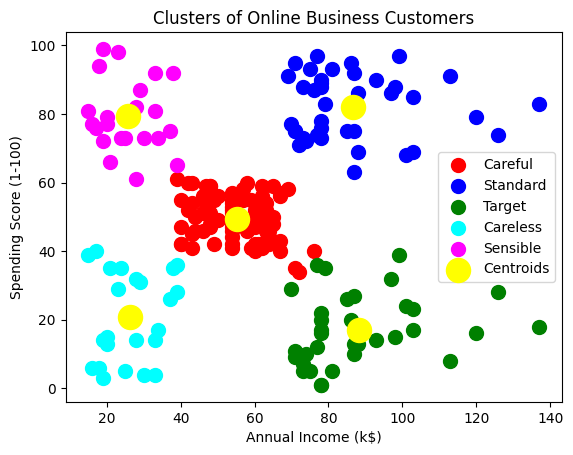

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the dataset and extract relevant features
data = pd.read_csv("Datasets_5/OnlineBusinessCustomers.csv")
X = data.iloc[:, [3, 4]].values

# Find the optimal number of clusters using the Elbow Method
wcss = [KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X).inertia_ for i in range(1, 11)]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters and centroids
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']
for i in range(5):
    plt.scatter(X[Y_kmeans == i, 0], X[Y_kmeans == i, 1], s=100, c=colors[i], label=labels[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Online Business Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Read the dataset and preprocess
df = pd.read_csv("Datasets_5/online_retail_II.csv", encoding='ISO-8859-1')
df = df[~df['Invoice'].str.contains('C')]

# Create basket and apply Apriori
basket = (df[df['Country'] == "France"]
          .pivot_table(index='Invoice', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)
          .applymap(lambda x: 1 if x >= 1 else 0)
          .drop(columns=['POSTAGE']))
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)

# Generate and filter association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
interesting_rules = rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]

# Display interesting rules in tabular format
print(interesting_rules[['consequents', 'support', 'confidence', 'lift','leverage']])

                              consequents   support  confidence      lift  \
2            (ALARM CLOCK BAKELIKE GREEN)  0.079082    0.837838  8.642959   
3             (ALARM CLOCK BAKELIKE RED )  0.079082    0.815789  8.642959   
16  (SET/20 RED RETROSPOT PAPER NAPKINS )  0.102041    0.800000  6.030769   
18          (SET/6 RED SPOTTY PAPER CUPS)  0.122449    0.960000  6.968889   
19        (SET/6 RED SPOTTY PAPER PLATES)  0.122449    0.888889  6.968889   
20  (SET/20 RED RETROSPOT PAPER NAPKINS )  0.099490    0.812500  6.125000   
21          (SET/6 RED SPOTTY PAPER CUPS)  0.099490    0.975000  7.077778   
22        (SET/6 RED SPOTTY PAPER PLATES)  0.099490    0.975000  7.644000   

    leverage  
2   0.069932  
3   0.069932  
16  0.085121  
18  0.104878  
19  0.104878  
20  0.083247  
21  0.085433  
22  0.086474  


C:\Users\Vaibhav\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
